<a href="https://colab.research.google.com/github/YorkJong/vistock/blob/main/examples/vistock_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install vistock from GitHub

In [1]:
%pip install git+https://github.com/YorkJong/vistock.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/YorkJong/vistock.git to /tmp/pip-req-build-bi_tnth1
  Running command git clone --filter=blob:none --quiet https://github.com/YorkJong/vistock.git /tmp/pip-req-build-bi_tnth1
  Resolved https://github.com/YorkJong/vistock.git to commit 4e9273ec4ba2121089eea35f134a20c6a0f447c1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.0 MB/s eta 

### Install TA-Lib optionally (used only by vistock.mpl.rsi module)

In [ ]:
import platform

if 'google.colab' in sys.modules:       # Colab
    !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
    !tar -xzvf ta-lib-0.4.0-src.tar.gz
    %cd ta-lib
    !./configure --prefix=/usr
    !make
    !make install
elif platform.system() == "Darwin":     # macOS
    !brew install ta-lib

%pip install Ta-Lib

References:
* [Installation of Ta-Lib in Python: A Complete Guide for all Platforms](https://blog.quantinsti.com/install-ta-lib-python/)

### Plot with mplfinance

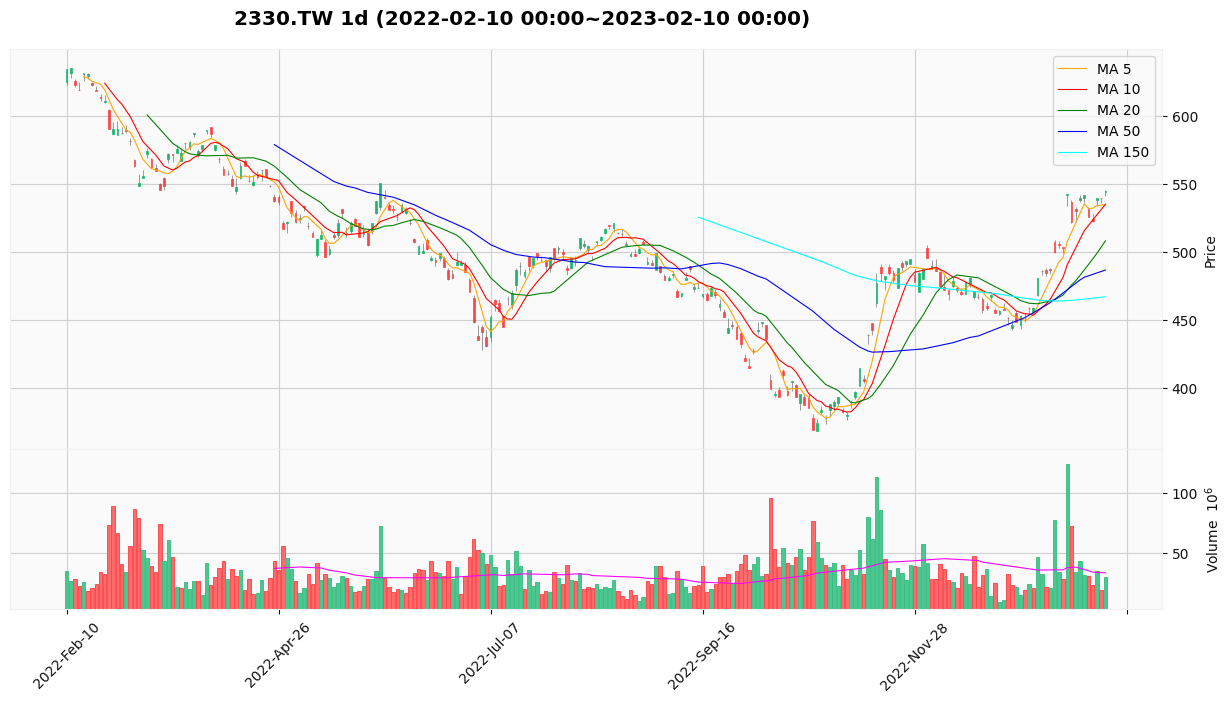

In [34]:
#@title Interval of Inter Days { run: "auto" }
kind = "Price, Volume, RSI" #@param ["Price, Volume, RSI", "Price by Volume"]
ticker = "2330.TW" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "2330.TW", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ["3mo", "6mo", "1y", "2y", "5y", "max"]
interval = "1d" #@param ["1d", "5d", "1wk", "1mo"]
legend_location = "best" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
            
import vistock.mpl as vsm

tbl = {
    'Price, Volume, RSI': vsm.rsi,  
    'Price by Volume': vsm.pbv,  
}

tbl[kind].plot(ticker, period=period, interval=interval, legend_loc=legend_location)


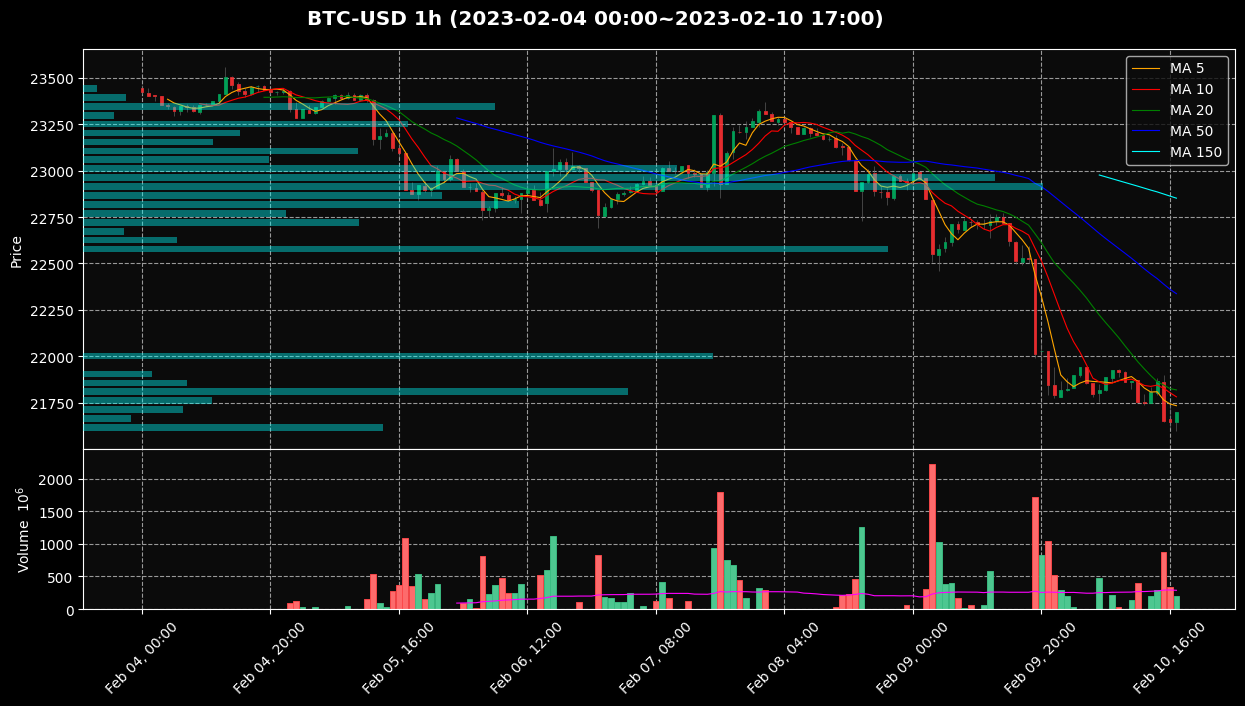

In [70]:
#@title Interval of Intra Day { run: "auto" }
kind = "Price by Volume" #@param ["Price, Volume, RSI", "Price by Volume"]
ticker = "BTC-USD" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "2330.TW", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "7d" #@param ["1d", "2d", "3d", "4d", "5d", "6d", "7d"]
interval = "1h" #@param ["1m", "2m", "5m", "15m", "30m", "1h"]
legend_location = "best" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
            
import vistock.mpl as vsm

tbl = {
    'Price, Volume, RSI': vsm.rsi,  
    'Price by Volume': vsm.pbv,  
}

tbl[kind].plot(ticker, period=period, interval=interval, legend_loc=legend_location)

### Plot with Plotly

In [72]:
#@title Interval of Inter Days { run: "auto" }
kind = "Price by Volume with 4 Subplots" #@param ["Price and Volume Overlaid", "Price and Volume Separated", "Price by Volume with 4 Subplots", "Price by Volume with 2 Subplots"]
ticker = "BTC-USD" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "2330.TW", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ["3mo", "6mo", "1y", "2y", "5y", "max"]
interval = "1d" #@param ["1d", "5d", "1wk", "1mo"]

import vistock.plotly as vsp

tbl = {
    'Price and Volume Overlaid': vsp.pv1s,     
    'Price and Volume Separated': vsp.pv2s,     
    'Price by Volume with 4 Subplots': vsp.pbv4s,    
    'Price by Volume with 2 Subplots': vsp.pbv2s,    
}

tbl[kind].plot(ticker, period=period, interval=interval)

In [75]:
#@title Interval of Intra Day { run: "auto" }
kind = "Price by Volume with 2 Subplots" #@param ["Price and Volume Overlaid", "Price and Volume Separated", "Price by Volume with 4 Subplots", "Price by Volume with 2 Subplots"]
ticker = "GOOG" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "2330.TW", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "7d" #@param ["1d", "2d", "3d", "4d", "5d", "6d", "7d"]
interval = "1h" #@param ["1m", "2m", "5m", "15m", "30m", "1h"]

import vistock.plotly as vsp

tbl = {
    'Price and Volume Overlaid': vsp.pv1s,     
    'Price and Volume Separated': vsp.pv2s,     
    'Price by Volume with 4 Subplots': vsp.pbv4s,    
    'Price by Volume with 2 Subplots': vsp.pbv2s,    
}

tbl[kind].plot(ticker, period=period, interval=interval)